This code first involves reading the input files and then normalizing the values w.r.t fragment length 


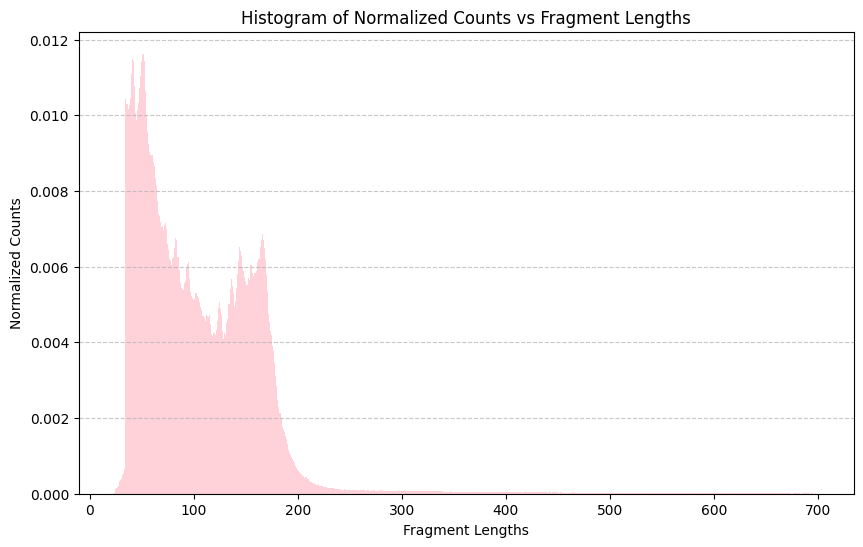

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# I have read the bed file as a zip file and then proceeded
fragment_lengths = []

with gzip.open('query.bed.gz', 'rt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '': # Here I am ignoring the comment lines as the input file contains such lines 
            continue
        parts = line.strip().split()
        start = int(parts[1])
        end = int(parts[2])
        fragment_lengths.append(end - start) # As explained in the question

# Here I am counting the occurences of each fragment length
length_counts = Counter(fragment_lengths)

# Now I will normalize by dividing by the total number of fragments
# This is done to get the normalized counts
total_fragments = sum(length_counts.values())
lengths = np.array(list(length_counts.keys()))
counts = np.array(list(length_counts.values()))
normalized_counts = counts / total_fragments

# Now I will plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(lengths, normalized_counts, width=1.0, color='pink', alpha=0.7)
plt.xlabel('Fragment Lengths')
plt.ylabel('Normalized Counts')
plt.title('Histogram of Normalized Counts vs Fragment Lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now, I will read the reference.hist file and do the sampling from my original query.bed

This will allow me to sample my queries in such a way that the frequencies match the proportions given in reference.hist


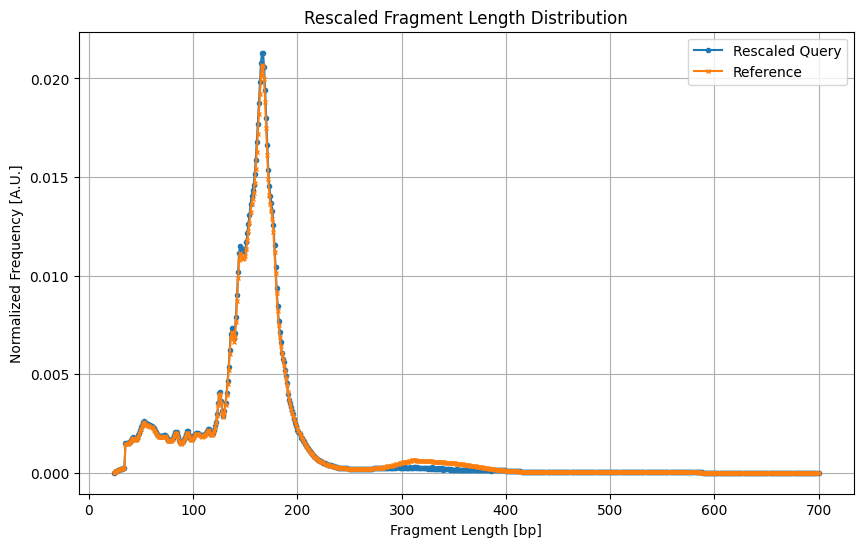

In [2]:
ref_lengths = []
ref_freqs = []

with open('reference.hist', 'r') as f:
    for line in f:
        if line.strip() == '':
            continue
        l, freq = map(float, line.strip().split())
        ref_lengths.append(int(l))
        ref_freqs.append(freq)

ref_lengths = np.array(ref_lengths)
ref_freqs = np.array(ref_freqs)
target_total = int(0.3 * len(fragment_lengths))
ref_counts_target = (ref_freqs / ref_freqs.sum()) * target_total
ref_counts_target = ref_counts_target.astype(int)

#I am sampling the given data and correspondingly plotting the graph 
fragment_pool = Counter(fragment_lengths)

# Now, I will resample the fragments based on the reference distribution
rescaled_fragments = []

for l, target_count in zip(ref_lengths, ref_counts_target):
    available = fragment_pool.get(l, 0)
    if available == 0:
        continue
    sample_count = min(available, target_count)
    rescaled_fragments.extend([l] * sample_count)
    fragment_pool[l] -= sample_count  # Decreasing the availability of the fragment

# Now I will normalize the rescaled fragments
rescaled_counter = Counter(rescaled_fragments)
lengths_rescaled = np.array(list(rescaled_counter.keys()))
counts_rescaled = np.array(list(rescaled_counter.values()))
normalized_rescaled_counts = counts_rescaled / counts_rescaled.sum()

#Here, I am plotting the rescaled histogram

plt.figure(figsize=(10,6))
plt.plot(lengths_rescaled, normalized_rescaled_counts, 'o-', label='Rescaled Query', markersize=3)
plt.plot(ref_lengths, ref_freqs / ref_freqs.sum(), 'x-', label='Reference', markersize=3)
plt.xlabel('Fragment Length [bp]')
plt.ylabel('Normalized Frequency [A.U.]')
plt.title('Rescaled Fragment Length Distribution')
plt.legend()
plt.grid(True)
plt.show()


Now, I will plot the respective graphs 

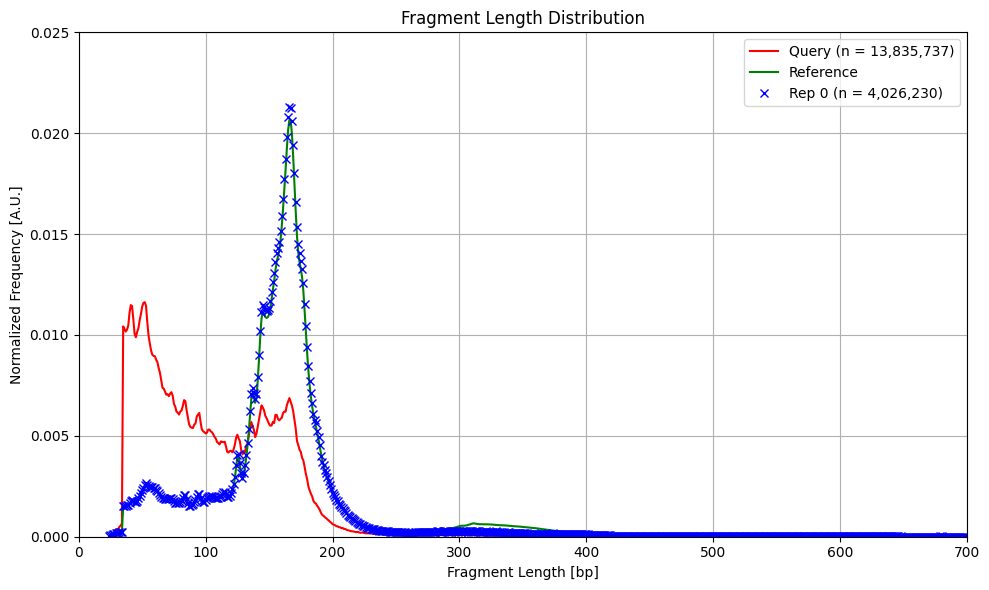

In [3]:
#Now I will combine both the plots to get the final output 
plt.figure(figsize=(10, 6))

# I will plot the histogram of the original query data
sorted_idx = np.argsort(lengths)
plt.plot(lengths[sorted_idx], normalized_counts[sorted_idx], color='red', label=f'Query (n = {len(fragment_lengths):,})')

# Here, I am plotting the reference histogram 
sorted_idx_ref = np.argsort(ref_lengths)
plt.plot(ref_lengths[sorted_idx_ref], ref_freqs[sorted_idx_ref] / ref_freqs.sum(), color='green', label='Reference')

# Here, I am plotting the rescaled histogram
sorted_idx_rescaled = np.argsort(normalized_rescaled_counts)
plt.plot(lengths_rescaled[sorted_idx_rescaled], normalized_rescaled_counts[sorted_idx_rescaled], 
         marker='x', linestyle='None', color='blue', label=f'Rep 0 (n = {len(rescaled_fragments):,})')

# Giving the final labels and titles to the histogram
plt.xlabel('Fragment Length [bp]')
plt.ylabel('Normalized Frequency [A.U.]')
plt.title('Fragment Length Distribution')
plt.legend()
plt.grid(True)
plt.xlim(0, 700)
plt.ylim(0, 0.025)
plt.tight_layout()
plt.show()
